In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
s = pd.read_csv("C:\\Users\\DELL\\Downloads\\cricket_data.csv")
s

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
0,2024,Ruturaj Gaikwad,2,0,61,46,30.5,51,119.61,0,...,2,0,0,0,0,0,0,0,0,0
1,2023,Ruturaj Gaikwad,16,1,590,92,42.14,400,147.5,0,...,16,0,0,0,0,0,0,0,0,0
2,2022,Ruturaj Gaikwad,14,0,368,99,26.29,291,126.46,0,...,14,0,0,0,0,0,0,0,0,0
3,2021,Ruturaj Gaikwad,16,2,635,101*,45.35,466,136.26,1,...,16,0,0,0,0,0,0,0,0,0
4,2020,Ruturaj Gaikwad,6,2,204,72,51,169,120.71,0,...,6,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,2022,Mayank Markande,2,0,0,0,0,0,0,0,...,2,42,57,1,1/26,57.00,8.14,42.00,0,0
1168,2021,Mayank Markande,1,0,0,0,0.00,0,0.00,0,...,1,18,26,0,0/26,0,8.66,0,0,0
1169,2019,Mayank Markande,3,1,6,6,6.00,5,120.00,0,...,3,36,59,1,1/23,59.00,9.83,36.00,0,0
1170,2018,Mayank Markande,14,4,21,7*,10.50,24,87.50,0,...,14,264,368,15,4/23,24.53,8.36,17.60,1,0


In [3]:
print(s.isnull().sum())       
s.replace(["NULL", "NaN", "-", " ", ""], np.nan, inplace=True)
s.fillna(0, inplace=True)

Year                   0
Player_Name            0
Matches_Batted         0
Not_Outs               0
Runs_Scored            0
Highest_Score          0
Batting_Average        0
Balls_Faced            0
Batting_Strike_Rate    0
Centuries              0
Half_Centuries         0
Fours                  0
Sixes                  0
Catches_Taken          0
Stumpings              0
Matches_Bowled         0
Balls_Bowled           0
Runs_Conceded          0
Wickets_Taken          0
Best_Bowling_Match     0
Bowling_Average        0
Economy_Rate           0
Bowling_Strike_Rate    0
Four_Wicket_Hauls      0
Five_Wicket_Hauls      0
dtype: int64


In [4]:
print(s.isnull().sum())       
s.replace(["NULL", "NaN", "-", " ", ""], np.nan, inplace=True)
s.fillna(0, inplace=True)

Year                   0
Player_Name            0
Matches_Batted         0
Not_Outs               0
Runs_Scored            0
Highest_Score          0
Batting_Average        0
Balls_Faced            0
Batting_Strike_Rate    0
Centuries              0
Half_Centuries         0
Fours                  0
Sixes                  0
Catches_Taken          0
Stumpings              0
Matches_Bowled         0
Balls_Bowled           0
Runs_Conceded          0
Wickets_Taken          0
Best_Bowling_Match     0
Bowling_Average        0
Economy_Rate           0
Bowling_Strike_Rate    0
Four_Wicket_Hauls      0
Five_Wicket_Hauls      0
dtype: int64


In [5]:
numeric_cols = s.columns.drop(['Player_Name', 'Best_Bowling_Match'])
s[numeric_cols] = s[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
s[numeric_cols] = scaler.fit_transform(s[numeric_cols])

In [7]:
s.drop_duplicates(inplace=True)

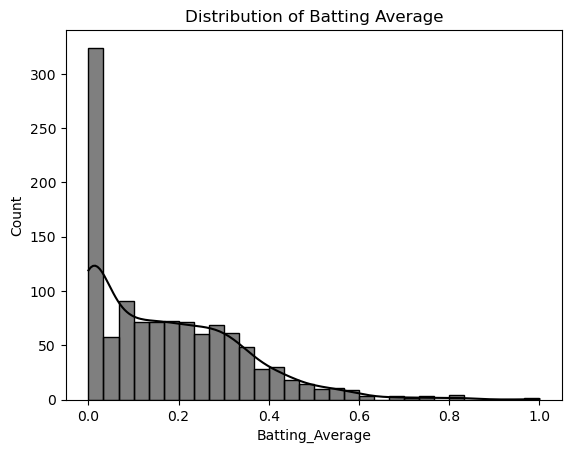

In [29]:
sns.histplot(s['Batting_Average'], bins=30, kde=True, color = 'black')
plt.title("Distribution of Batting Average")
plt.show()

In [9]:
top_strike = s.loc[s['Batting_Strike_Rate'].idxmax()]
print("Top Strike Rate Player:\n", top_strike[['Player_Name', 'Batting_Strike_Rate']])

Top Strike Rate Player:
 Player_Name            Prerak Mankad
Batting_Strike_Rate              1.0
Name: 541, dtype: object


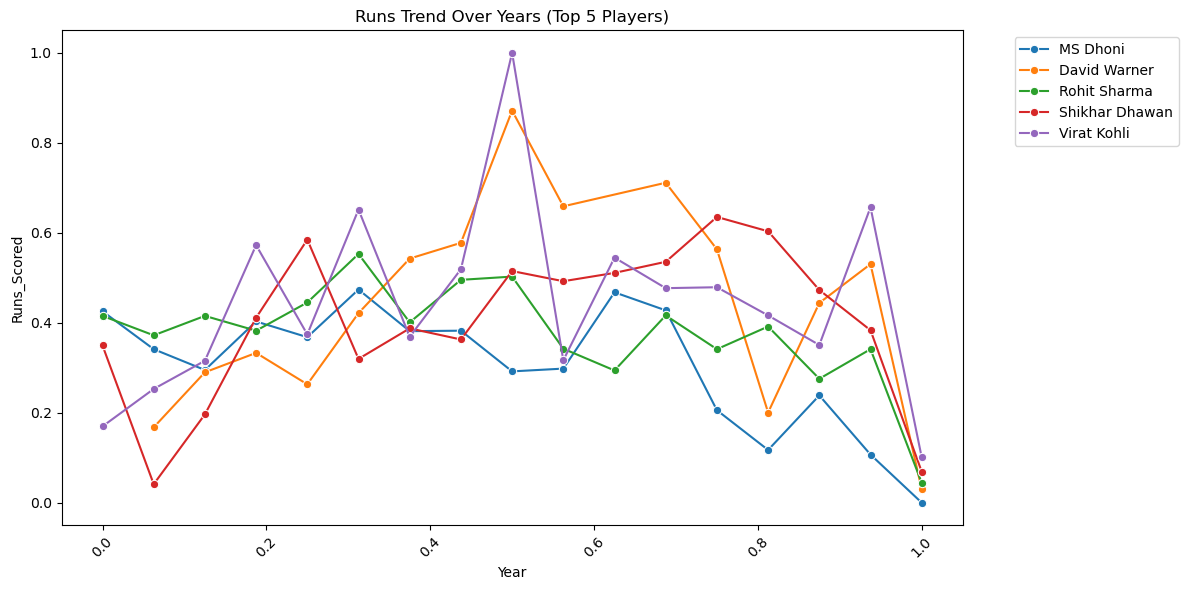

In [10]:
top_players = s.groupby('Player_Name')['Runs_Scored'].sum().nlargest(5).index
s_top = s[s['Player_Name'].isin(top_players)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=s_top, x='Year', y='Runs_Scored', hue='Player_Name', marker='o')
plt.title("Runs Trend Over Years (Top 5 Players)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
top3_centuries = s.groupby('Player_Name')['Centuries'].sum().nlargest(3)
print(top3_centuries)

Player_Name
Virat Kohli     1.75
Jos Buttler     1.25
David Warner    1.00
Name: Centuries, dtype: float64


In [12]:
highest_economy = s.loc[s['Economy_Rate'].idxmax()]
print(highest_economy[['Player_Name', 'Economy_Rate']])

Player_Name     Yashasvi Jaiswal
Economy_Rate                 1.0
Name: 831, dtype: object


In [ ]:
s
s['Fours'] = pd.to_numeric(s['Fours'], errors='coerce')
s['Sixes'] = pd.to_numeric(s['Sixes'], errors='coerce')
s['Runs_Scored'] = pd.to_numeric(s['Runs_Scored'], errors='coerce')


s['Boundary_Percentage'] = np.where(
    s['Runs_Scored'] > 0,
    ((s['Fours'] * 4 + s['Sixes'] * 6) / s['Runs_Scored']) * 100,
    0
)


In [14]:
s['Batting_Impact_Score'] = s['Runs_Scored'] * s['Batting_Strike_Rate'] * s['Batting_Average']

In [15]:

s['Batting_Impact_Score'] = pd.to_numeric(s['Batting_Impact_Score'], errors='coerce')
s['Wickets_Taken'] = pd.to_numeric(s['Wickets_Taken'], errors='coerce')
s['Economy_Rate'] = pd.to_numeric(s['Economy_Rate'], errors='coerce')



In [16]:
def categorize(sr):
    if sr >= 140:
        return "Aggressive"
    elif sr >= 110:
        return "Balanced"
    else:
        return "Defensive"
s['Player_Type'] = s['Batting_Strike_Rate'].apply(categorize)

In [17]:
s.sort_values(by=['Player_Name', 'Year'], inplace=True)
s['YoY_Growth_Runs'] = s.groupby('Player_Name')['Runs_Scored'].diff()

In [18]:
s.sort_values(by=['Player_Name', 'Year'], inplace=True)
s['YoY_Growth_Runs'] = s.groupby('Player_Name')['Runs_Scored'].diff()

Total rows selected: 15
Unique players plotted: 15


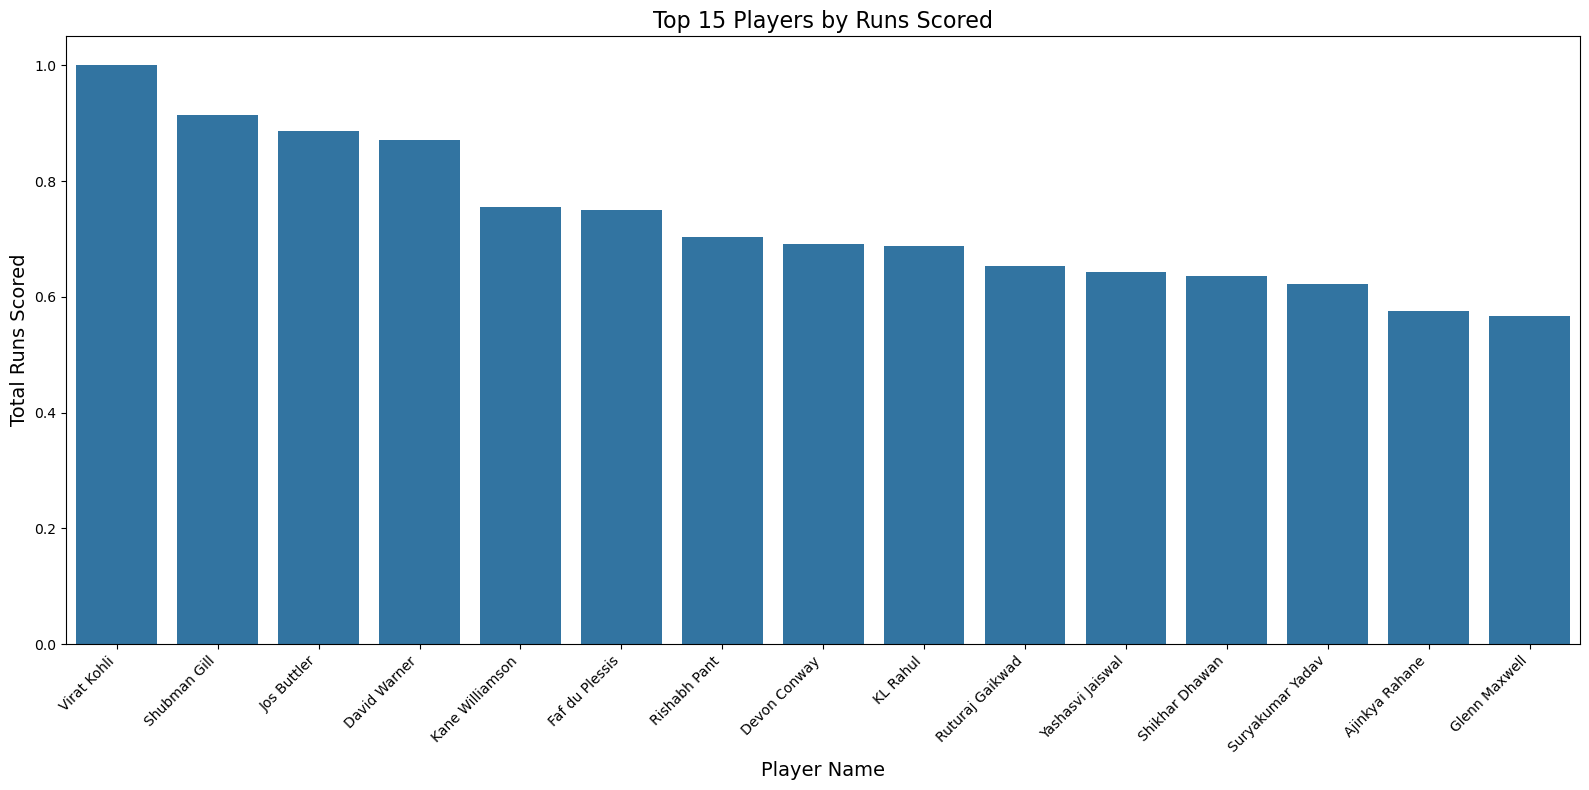

In [32]:
if 'Player_Name' in s.columns and 'Runs_Scored' in s.columns:    
    s_clean = s.dropna(subset=['Player_Name', 'Runs_Scored'])

    s_sorted = s_clean.sort_values(by='Runs_Scored', ascending=False)
    s_sorted = s_sorted.drop_duplicates(subset='Player_Name').head(15)

    print("Total rows selected:", len(s_sorted))
    print("Unique players plotted:", s_sorted['Player_Name'].nunique())

    plt.figure(figsize=(16, 8))
    sns.barplot(data=s_sorted, x='Player_Name', y='Runs_Scored' )
    plt.xticks(rotation=45, ha='right')
    plt.title("Top 15 Players by Runs Scored", fontsize=16)
    plt.xlabel("Player Name", fontsize=14)
    plt.ylabel("Total Runs Scored", fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns are missing.")

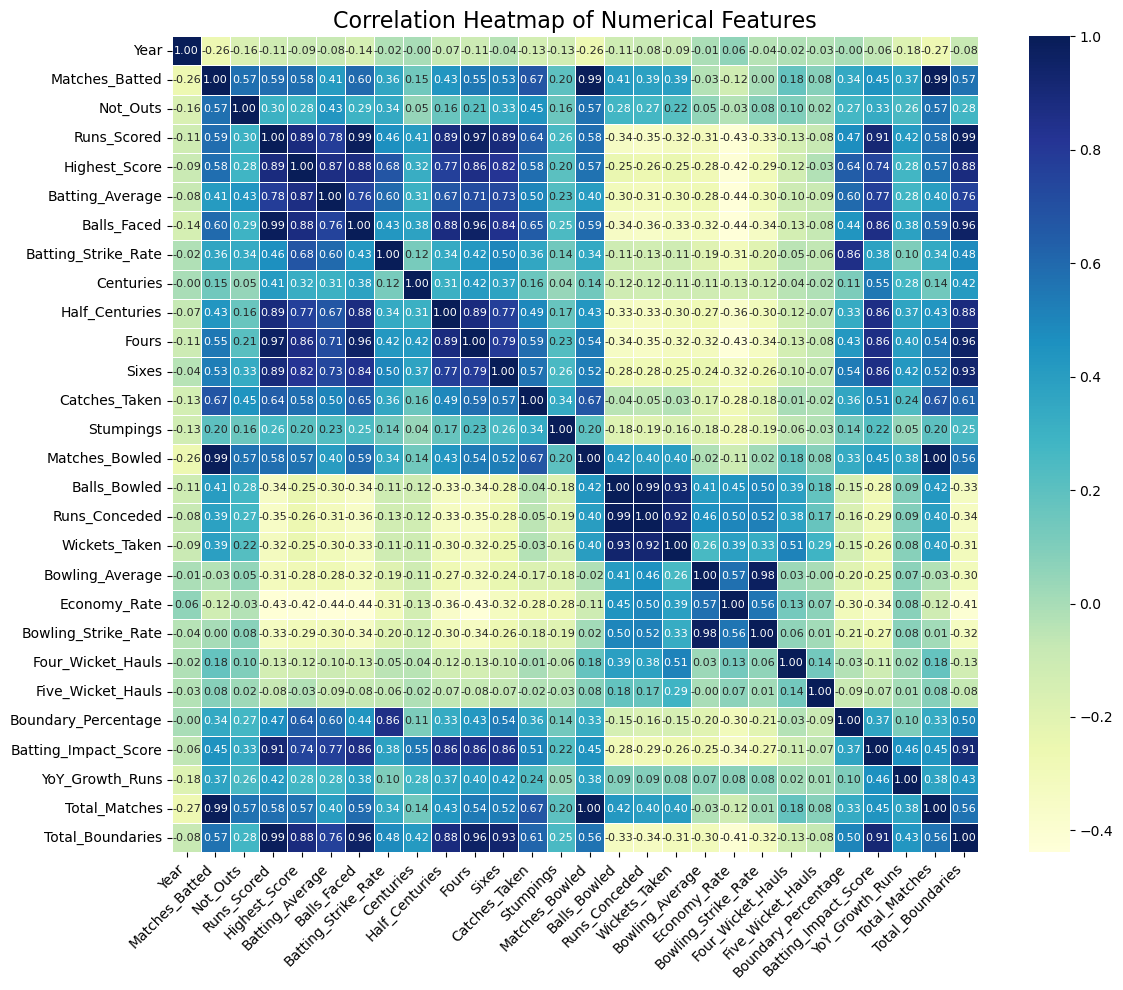

In [34]:
numeric_s = s.select_dtypes(include=['number'])

correlation_matrix = numeric_s.corr()

plt.figure(figsize=(12, 10))  

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='YlGnBu',
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 8}
     
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)               
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16456\2458811167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_s['Year'] = pd.to_numeric(player_s['Year'], errors='coerce')


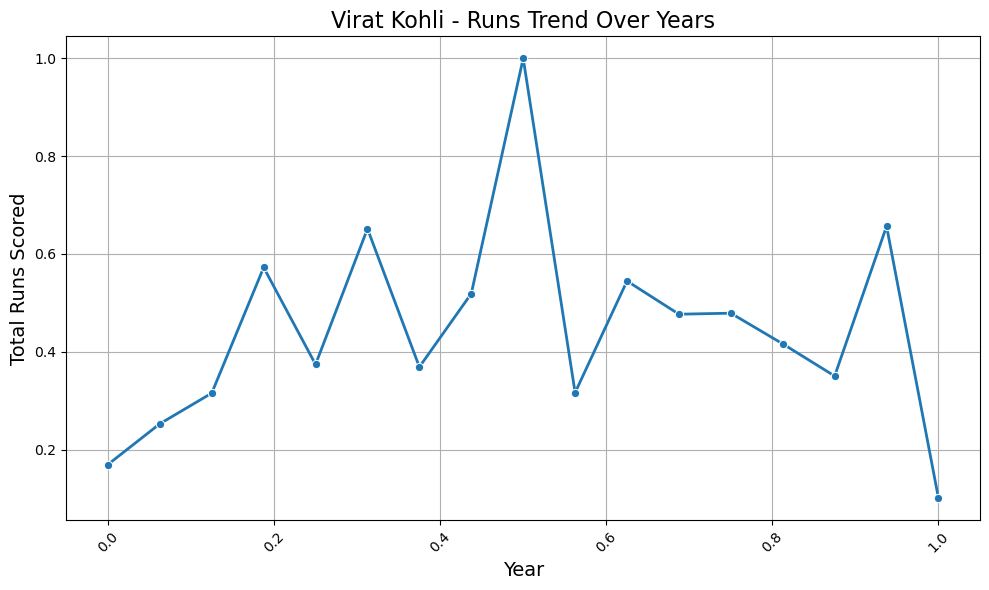

In [21]:
player_name = 'Virat Kohli'
player_s = s[s['Player_Name'] == player_name]
player_s['Year'] = pd.to_numeric(player_s['Year'], errors='coerce')
player_s = player_s.dropna(subset=['Year', 'Runs_Scored'])
player_s = player_s.sort_values(by='Year')


yearly_runs = player_s.groupby('Year')['Runs_Scored'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_runs, x='Year', y='Runs_Scored', marker='o', linewidth=2)

plt.title(f"{player_name} - Runs Trend Over Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Runs Scored", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

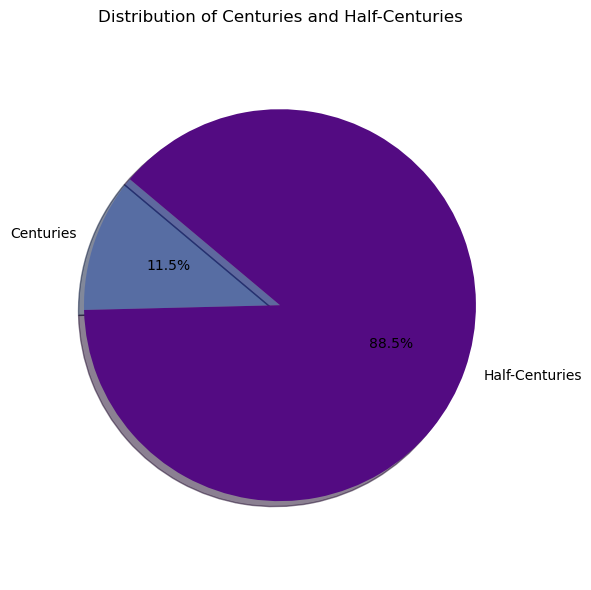

In [ ]:
if 'Centuries' in s.columns and 'Half_Centuries' in s.columns:

    total_centuries = s['Centuries'].fillna(0).sum()
    total_half_centuries = s['Half_Centuries'].fillna(0).sum()

  
    if total_centuries > 0 or total_half_centuries > 0:
        # Data for pie chart
        labels = ['Centuries', 'Half-Centuries']
        sizes = [total_centuries, total_half_centuries]
        colors = ["#0f3eb55c", "#530b82"]

        # Plot pie chart
        plt.figure(figsize=(6, 6))
        plt.pie(
            sizes,
            labels=labels,
            autopct='%1.1f%%',
            startangle=140,
            colors=colors,
            shadow=True
        )
        plt.title("Distribution of Centuries and Half-Centuries")
        plt.axis('equal')  
        plt.tight_layout()
        plt.show()
    else:
        print("Both totals are zero. No data to plot.")
else:
    print("Columns 'Centuries' or 'Half_Centuries' not found in the DataFrame.")

C:\Users\DELL\AppData\Local\Temp\ipykernel_16456\2461019397.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


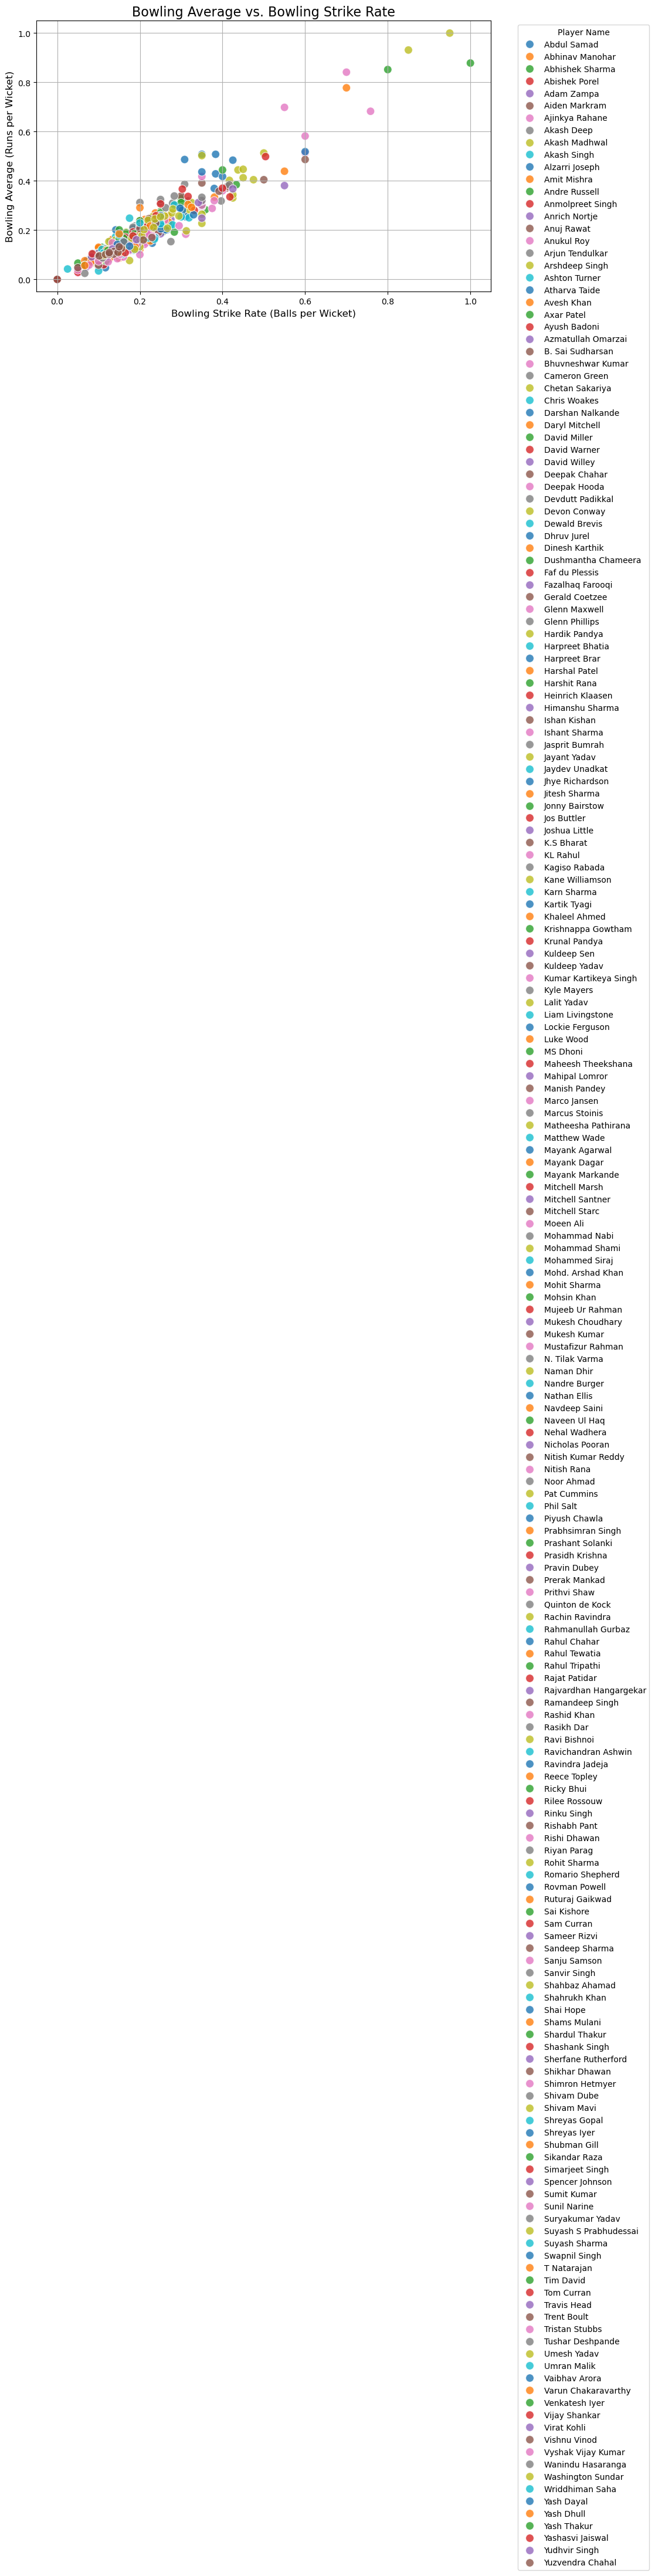

In [23]:
bowling_s = s[['Player_Name', 'Bowling_Average', 'Bowling_Strike_Rate']].dropna()

bowling_s['Bowling_Average'] = pd.to_numeric(bowling_s['Bowling_Average'], errors='coerce')
bowling_s['Bowling_Strike_Rate'] = pd.to_numeric(bowling_s['Bowling_Strike_Rate'], errors='coerce')
bowling_s = bowling_s.dropna()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=bowling_s,
    x='Bowling_Strike_Rate',
    y='Bowling_Average',
    hue='Player_Name',
    palette='tab10',
    s=100,  
    alpha=0.8
)

plt.title("Bowling Average vs. Bowling Strike Rate", fontsize=16)
plt.xlabel("Bowling Strike Rate (Balls per Wicket)", fontsize=12)
plt.ylabel("Bowling Average (Runs per Wicket)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Player Name')
plt.grid(True)
plt.tight_layout()
plt.show()

## Q21

In [24]:
if 'Player_Name' in s.columns and 'Batting_Average' in s.columns:
    s['Batting_Average'] = pd.to_numeric(s['Batting_Average'], errors='coerce')
    top_batting_avg = s[['Player_Name', 'Batting_Average']].dropna()
    
    top_5_avg = top_batting_avg.sort_values(by='Batting_Average', ascending=False).head(5)
    
    print("Top 5 Players with Highest Batting Average:")
    print(top_5_avg)
else:
    print("Required columns not found in the DataFrame.")

Top 5 Players with Highest Batting Average:
        Player_Name  Batting_Average
509    Deepak Hooda         1.000000
405   Manish Pandey         0.831683
12         MS Dhoni         0.823762
1040     Tom Curran         0.821782
946     Virat Kohli         0.802772


## Q22

In [25]:
s['Matches_Batted'] = pd.to_numeric(s['Matches_Batted'], errors='coerce')
s['Matches_Bowled'] = pd.to_numeric(s['Matches_Bowled'], errors='coerce')
s['Total_Matches'] = s[['Matches_Batted', 'Matches_Bowled']].max(axis=1)

most_matches = s.groupby('Player_Name')['Total_Matches'].sum().sort_values(ascending=False).reset_index()
print("Player with most matches played:")
print(most_matches.head(1))

Player with most matches played:
  Player_Name  Total_Matches
0    MS Dhoni      13.263158


## Q23:

In [26]:
s['Runs_Scored'] = pd.to_numeric(s['Runs_Scored'], errors='coerce')
players_500 = s[s['Runs_Scored'] > 500][['Year', 'Player_Name', 'Runs_Scored']].sort_values(by='Runs_Scored', ascending=False)
print("Players who scored more than 500 runs in a season:")
print(players_500)

Players who scored more than 500 runs in a season:
Empty DataFrame
Columns: [Year, Player_Name, Runs_Scored]
Index: []


## Q25: 

In [27]:
s['Fours'] = pd.to_numeric(s['Fours'], errors='coerce')
s['Sixes'] = pd.to_numeric(s['Sixes'], errors='coerce')
s['Total_Boundaries'] = s['Fours'] + s['Sixes']

boundaries = s.groupby('Player_Name')['Total_Boundaries'].sum().sort_values(ascending=False).reset_index()
print("Top players by total boundaries:")
print(boundaries.head(10))

Top players by total boundaries:
      Player_Name  Total_Boundaries
0     Virat Kohli         11.989510
1    David Warner         11.759615
2  Shikhar Dhawan         11.490385
3    Rohit Sharma         11.336538
4        MS Dhoni          8.562063
5  Dinesh Karthik          7.806818
6        KL Rahul          7.348776
7  Faf du Plessis          7.129371
8    Sanju Samson          7.104021
9  Ajinkya Rahane          7.055070


## Q24:

In [28]:
s['Five_Wicket_Hauls'] = pd.to_numeric(s['Five_Wicket_Hauls'], errors='coerce')
players_5w = s[s['Five_Wicket_Hauls'] >= 1][['Year', 'Player_Name', 'Five_Wicket_Hauls']]
print("Players with at least one 5-wicket haul:")
print(players_5w)

Players with at least one 5-wicket haul:
        Year          Player_Name  Five_Wicket_Hauls
920   0.5000           Adam Zampa                1.0
682   0.9375        Akash Madhwal                1.0
1021  0.6875       Alzarri Joseph                1.0
575   0.0000          Amit Mishra                1.0
416   0.8125        Andre Russell                1.0
769   0.8125       Arshdeep Singh                1.0
1133  0.5625    Bhuvneshwar Kumar                1.0
1127  0.9375    Bhuvneshwar Kumar                1.0
793   0.8125        Harshal Patel                1.0
208   0.1875        Ishant Sharma                1.0
654   0.8750       Jasprit Bumrah                1.0
1152  0.3125       Jaydev Unadkat                1.0
1148  0.5625       Jaydev Unadkat                1.0
350   0.9375         Mohit Sharma                1.0
55    0.2500      Ravindra Jadeja                1.0
452   0.2500         Sunil Narine                1.0
1163  0.8750          Umran Malik                1.0
459  